<a href="https://colab.research.google.com/github/govardhan-06/GenAI-Notebooks/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Dividing into independent and dependent features
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#Feature Engineering
geometry=pd.get_dummies(X['Geography'], dtype=int, drop_first=True)
gender=pd.get_dummies(X['Gender'], dtype=int, drop_first=True)

In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X=pd.concat([X,geometry,gender],axis=1)

In [ ]:
#Splitting data into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [38]:
#Input layer
#Units is the number of neurons
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.2))

In [39]:
#First hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [40]:
#Second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [41]:
#Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [46]:
#Training
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [44]:
#Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [47]:
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 6ms/step - loss: 0.4121 - accuracy: 0.8330 - val_loss: 0.3831 - val_accuracy: 0.8489
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3869 - accuracy: 0.8414 - val_loss: 0.3937 - val_accuracy: 0.8478
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3968 - accuracy: 0.8414 - val_loss: 0.3919 - val_accuracy: 0.8448
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3998 - accuracy: 0.8378 - val_loss: 0.3903 - val_accuracy: 0.8440
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3863 - accuracy: 0.8461 - val_loss: 0.3803 - val_accuracy: 0.8451
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3752 - accuracy: 0.8509 - val_loss: 0.4068 - val_accuracy: 0.8410
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3734 - accuracy: 0.8515 - val_loss: 0.3882 - val_accuracy:

In [48]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

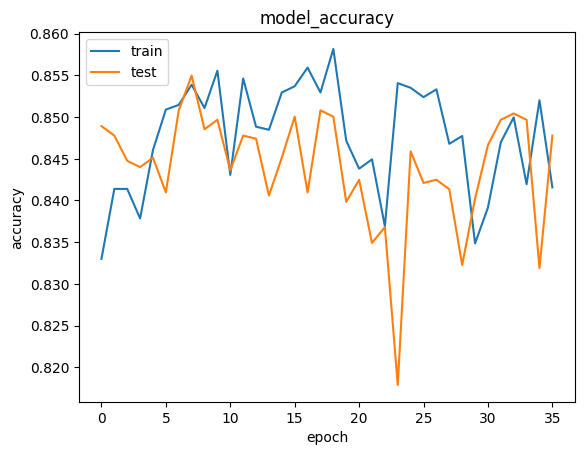

In [49]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

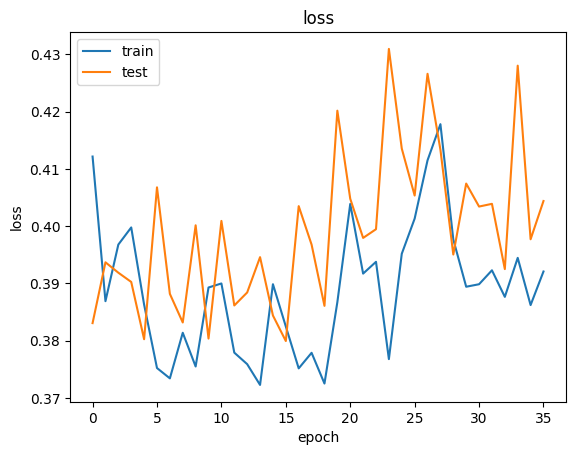

In [50]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [51]:
#Predicting the Test set results
y_pred=classifier.predict(x_test)
y_pred=y_pred>0.5

63/63 [==============================] - 0s 1ms/step


In [52]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1493,  102],
       [ 197,  208]])

In [53]:
#calculate the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [54]:
score

0.8505

In [55]:
#displaying the weights used in the neural network
classifier.get_weights()

[array([[-5.7374530e-02,  3.3942586e-01,  2.1390204e+00, -4.2456317e-01,
          8.9397915e-02, -7.2502720e-01, -3.3771420e-01, -3.2104049e-02,
         -3.6317635e-01,  2.0438159e+00, -9.9832404e-01],
        [-4.0027685e+00, -4.1037474e+00, -7.4291116e-01,  1.0402597e+00,
         -2.1473966e+00, -2.6004863e+00, -6.0554872e+00,  1.7958490e+00,
          2.7641153e+00, -5.0111060e+00, -1.8171964e+00],
        [ 1.8485132e-01,  2.4997507e-01, -1.3779069e+00, -2.4036753e-01,
          1.0908253e+00,  1.8201385e+00,  3.4986380e-01, -9.5710240e-02,
          1.0855136e+00, -9.3378973e-01,  6.5145701e-01],
        [ 6.8989355e-04, -7.7486730e-01, -1.9038414e+00,  1.4801576e+00,
          8.4387743e-01, -2.6430151e+00,  1.3813313e+00, -1.8804643e+00,
         -3.9389560e-01, -2.3106730e+00, -2.0530660e+00],
        [-6.5223314e-02, -1.7758200e+00, -5.5303492e-02,  4.1710215e+00,
          1.9620733e+00, -5.6438202e-01,  9.1054320e-01, -5.9007401e+00,
         -2.7204117e-01,  7.0786548e-0